In [47]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Obtain labels for patients recorded with different method

In [28]:
url_train = f'https://github.com/danielmlow/vfp/raw/master/data/output/vfp_v8_wo-24-patients/egemaps_vector_{data_type}_wo-24-patients.csv?raw=true' #'copied_raw_github_link'
df_train = pd.read_csv(url_train,  sep=',', encoding='latin1', index_col = 0)

recordingA_wo_24_patients = df_train.sid.unique() 

'''
recordingA_wo_24_patients = ['VFP10', 'VFP11', 'VFP14', 'VFP15', 'VFP16', 'VFP17', 'VFP19',
       'VFP1', 'VFP20', 'VFP21', 'VFP22', 'VFP23', 'VFP25', 'VFP26',
       'VFP2', 'VFP30', 'VFP32', 'VFP34', 'VFP35', 'VFP36', 'VFP37',
       'VFP39', 'VFP40', 'VFP41', 'VFP42', 'VFP43', 'VFP44', 'VFP45',
       'VFP46', 'VFP47', 'VFP48', 'VFP49', 'VFP50', 'VFP51', 'VFP52',
       'VFP57', 'VFP58', 'VFP59', 'VFP60', 'VFP61', 'VFP62', 'VFP63',
       'VFP67', 'VFP68', 'VFP69', 'VFP6', 'VFP70', 'VFP72', 'VFP73',
       'VFP75', 'VFP76', 'VFP77', 'VFP7', 'VFPNorm10', 'VFPNorm11',
       'VFPNorm12', 'VFPNorm13', 'VFPNorm14', 'VFPNorm15', 'VFPNorm16',
       'VFPNorm17', 'VFPNorm18', 'VFPNorm19', 'VFPNorm1', 'VFPNorm20',
       'VFPNorm21', 'VFPNorm22', 'VFPNorm23', 'VFPNorm24', 'VFPNorm25',
       'VFPNorm26', 'VFPNorm27', 'VFPNorm28', 'VFPNorm29', 'VFPNorm2',
       'VFPNorm30', 'VFPNorm31', 'VFPNorm32', 'VFPNorm33', 'VFPNorm34',
       'VFPNorm35', 'VFPNorm36', 'VFPNorm37', 'VFPNorm38', 'VFPNorm39',
       'VFPNorm3', 'VFPNorm40', 'VFPNorm41', 'VFPNorm42', 'VFPNorm43',
       'VFPNorm44', 'VFPNorm45', 'VFPNorm46', 'VFPNorm47', 'VFPNorm48',
       'VFPNorm49', 'VFPNorm4', 'VFPNorm50', 'VFPNorm51', 'VFPNorm52',
       'VFPNorm53', 'VFPNorm54', 'VFPNorm55', 'VFPNorm56', 'VFPNorm57',
       'VFPNorm58', 'VFPNorm59', 'VFPNorm5', 'VFPNorm60', 'VFPNorm61',
       'VFPNorm62', 'VFPNorm63', 'VFPNorm64', 'VFPNorm65', 'VFPNorm66',
       'VFPNorm67', 'VFPNorm68', 'VFPNorm69', 'VFPNorm6', 'VFPNorm70',
       'VFPNorm71', 'VFPNorm72', 'VFPNorm73', 'VFPNorm74', 'VFPNorm75',
       'VFPNorm76', 'VFPNorm77', 'VFPNorm7', 'VFPNorm8', 'VFPNorm9'] 
'''
print(len(recordingA_wo_24_patients))



url_test = f'https://github.com/danielmlow/vfp/raw/master/data/input/features/egemaps_vector_{data_type}.csv?raw=true' #'copied raw github button'
df_test = pd.read_csv(url_test,  sep=',', encoding='latin1', index_col = 0)

df_test = df_test[~df_test.sid.isin(recordingA_wo_24_patients)]
recordingB_24_patients = df_test.sid.unique() # 24 patients

'''
recordingB_24_patients = ['VFP12', 'VFP13', 'VFP18', 'VFP24', 'VFP27', 'VFP28', 'VFP29',
       'VFP31', 'VFP33', 'VFP38', 'VFP3', 'VFP4', 'VFP53', 'VFP54',
       'VFP55', 'VFP56', 'VFP5', 'VFP64', 'VFP65', 'VFP66', 'VFP71',
       'VFP74', 'VFP8', 'VFP9']
'''
print(len(recordingB_24_patients))

130
24


In [88]:
# Find matched controls to UVFP patients in train set
url = f'https://github.com/danielmlow/vfp/raw/master/data/input/VFP_DeidentifiedDemographics.csv' #'copied_raw_github_link'
demographics = pd.read_csv(url,  sep=',')
demographics


,ID:,Age:,Sex:,Occupation:,Side of Paralysis,ID:.1,Age:.1,Sex:.1,Occupation:.1
0,VFP1,58,F,Homemaker,Left VF paralysis,VFPNorm1,58,F,Administrative assistant
1,VFP2,74,M,Retired accountant,Left VF paralysis,VFPNorm2,75,M,Attorney
2,VFP3,72,F,Reitred teacher,Left VF paralysis,VFPNorm3,70,F,Retired singing teacher and artist
3,VFP4,58,F,None,Right VF Paralysis,VFPNorm4,58,F,Break glass
4,VFP5,61,M,None,Right VF Paralysis,VFPNorm5,61,M,Nurse and firefighter
...,...,...,...,...,...,...,...,...,...
72,VFP73,89,M,Owns/operates Cedardale club,Left VF paralysis,VFPNorm73,87,M,Retired custodian
73,VFP74,56,F,Senior VP of hospitality group,Left VF paralysis,VFPNorm74,56,F,Academic college counselor
74,VFP75,77,M,Retired facility worker,Right VF Paralysis,VFPNorm75,77,M,Retired school teacher
75,VFP76,26,F,College Student (singer),Left VF paralysis,VFPNorm76,25,F,Graduate in opera performance program


In [112]:
#Downsample: now training set is unbalanced (60 controls - 40 UVFP), so keep only matched controls to remaining UVFP patients.

patients_train_set = [n for n in recordingA_wo_24_patients if 'Norm' not in n]
matched_controls = [('VFPNorm'+n.split('VFP')[1]) for n in patients_train_set]
print(len(patients_train_set),patients_train_set)
print(len(matched_controls), matched_controls)
combined = patients_train_set+matched_controls
print(len(combined),combined)

53 ['VFP10', 'VFP11', 'VFP14', 'VFP15', 'VFP16', 'VFP17', 'VFP19', 'VFP1', 'VFP20', 'VFP21', 'VFP22', 'VFP23', 'VFP25', 'VFP26', 'VFP2', 'VFP30', 'VFP32', 'VFP34', 'VFP35', 'VFP36', 'VFP37', 'VFP39', 'VFP40', 'VFP41', 'VFP42', 'VFP43', 'VFP44', 'VFP45', 'VFP46', 'VFP47', 'VFP48', 'VFP49', 'VFP50', 'VFP51', 'VFP52', 'VFP57', 'VFP58', 'VFP59', 'VFP60', 'VFP61', 'VFP62', 'VFP63', 'VFP67', 'VFP68', 'VFP69', 'VFP6', 'VFP70', 'VFP72', 'VFP73', 'VFP75', 'VFP76', 'VFP77', 'VFP7']
53 ['VFPNorm10', 'VFPNorm11', 'VFPNorm14', 'VFPNorm15', 'VFPNorm16', 'VFPNorm17', 'VFPNorm19', 'VFPNorm1', 'VFPNorm20', 'VFPNorm21', 'VFPNorm22', 'VFPNorm23', 'VFPNorm25', 'VFPNorm26', 'VFPNorm2', 'VFPNorm30', 'VFPNorm32', 'VFPNorm34', 'VFPNorm35', 'VFPNorm36', 'VFPNorm37', 'VFPNorm39', 'VFPNorm40', 'VFPNorm41', 'VFPNorm42', 'VFPNorm43', 'VFPNorm44', 'VFPNorm45', 'VFPNorm46', 'VFPNorm47', 'VFPNorm48', 'VFPNorm49', 'VFPNorm50', 'VFPNorm51', 'VFPNorm52', 'VFPNorm57', 'VFPNorm58', 'VFPNorm59', 'VFPNorm60', 'VFPNorm61', '

# Run models

In [106]:

data_types = ['speech','vowel', 'both']
x_indices = ["F0semitoneFrom27.5Hz_sma3nz_amean", "F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope", "F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope", "F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2", "F0semitoneFrom27.5Hz_sma3nz_percentile20.0", "F0semitoneFrom27.5Hz_sma3nz_percentile50.0", "F0semitoneFrom27.5Hz_sma3nz_percentile80.0", "F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope", "F0semitoneFrom27.5Hz_sma3nz_stddevNorm", "F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope", "F1amplitudeLogRelF0_sma3nz_amean", "F1amplitudeLogRelF0_sma3nz_stddevNorm", "F1bandwidth_sma3nz_amean", "F1bandwidth_sma3nz_stddevNorm", "F1frequency_sma3nz_amean", "F1frequency_sma3nz_stddevNorm", "F2amplitudeLogRelF0_sma3nz_amean", "F2amplitudeLogRelF0_sma3nz_stddevNorm", "F2bandwidth_sma3nz_amean", "F2bandwidth_sma3nz_stddevNorm", "F2frequency_sma3nz_amean", "F2frequency_sma3nz_stddevNorm", "F3amplitudeLogRelF0_sma3nz_amean", "F3amplitudeLogRelF0_sma3nz_stddevNorm", "F3bandwidth_sma3nz_amean", "F3bandwidth_sma3nz_stddevNorm", "F3frequency_sma3nz_amean", "F3frequency_sma3nz_stddevNorm", "HNRdBACF_sma3nz_amean", "HNRdBACF_sma3nz_stddevNorm", "MeanUnvoicedSegmentLength", "MeanVoicedSegmentLengthSec", "StddevUnvoicedSegmentLength", "StddevVoicedSegmentLengthSec", "VoicedSegmentsPerSec", "alphaRatioUV_sma3nz_amean", "alphaRatioV_sma3nz_amean", "alphaRatioV_sma3nz_stddevNorm", "equivalentSoundLevel_dBp", "hammarbergIndexUV_sma3nz_amean", "hammarbergIndexV_sma3nz_amean", "hammarbergIndexV_sma3nz_stddevNorm", "jitterLocal_sma3nz_amean", "jitterLocal_sma3nz_stddevNorm", "logRelF0-H1-A3_sma3nz_amean", "logRelF0-H1-A3_sma3nz_stddevNorm", "logRelF0-H1-H2_sma3nz_amean", "logRelF0-H1-H2_sma3nz_stddevNorm", "loudnessPeaksPerSec", "loudness_sma3_amean", "loudness_sma3_meanFallingSlope", "loudness_sma3_meanRisingSlope", "loudness_sma3_pctlrange0-2", "loudness_sma3_percentile20.0", "loudness_sma3_percentile50.0", "loudness_sma3_percentile80.0", "loudness_sma3_stddevFallingSlope", "loudness_sma3_stddevNorm", "loudness_sma3_stddevRisingSlope", "mfcc1V_sma3nz_amean", "mfcc1V_sma3nz_stddevNorm", "mfcc1_sma3_amean", "mfcc1_sma3_stddevNorm", "mfcc2V_sma3nz_amean", "mfcc2V_sma3nz_stddevNorm", "mfcc2_sma3_amean", "mfcc2_sma3_stddevNorm", "mfcc3V_sma3nz_amean", "mfcc3V_sma3nz_stddevNorm", "mfcc3_sma3_amean", "mfcc3_sma3_stddevNorm", "mfcc4V_sma3nz_amean", "mfcc4V_sma3nz_stddevNorm", "mfcc4_sma3_amean", "mfcc4_sma3_stddevNorm", "shimmerLocaldB_sma3nz_amean", "shimmerLocaldB_sma3nz_stddevNorm", "slopeUV0-500_sma3nz_amean", "slopeUV500-1500_sma3nz_amean", "slopeV0-500_sma3nz_amean", "slopeV0-500_sma3nz_stddevNorm", "slopeV500-1500_sma3nz_amean", "slopeV500-1500_sma3nz_stddevNorm", "spectralFluxUV_sma3nz_amean", "spectralFluxV_sma3nz_amean", "spectralFluxV_sma3nz_stddevNorm", "spectralFlux_sma3_amean", "spectralFlux_sma3_stddevNorm"]
classifier_names = ['LogisticRegression', 'MLP', 'RandomForest', 'SGD']

classifiers = [
          LogisticRegression(solver="liblinear", penalty = "l1", max_iter = 100), 
          MLPClassifier(alpha= 1, max_iter= 1000),
          RandomForestClassifier(n_estimators= 100),
          SGDClassifier(loss= "log", penalty= "elasticnet", early_stopping= True, max_iter= 5000),
          ]



speech
speech LogisticRegression 0.08


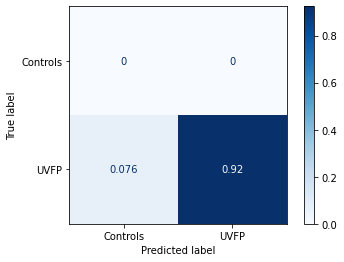




speech MLP 0.36


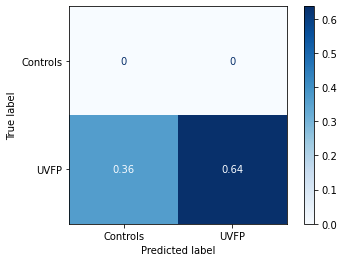




speech RandomForest 0.14


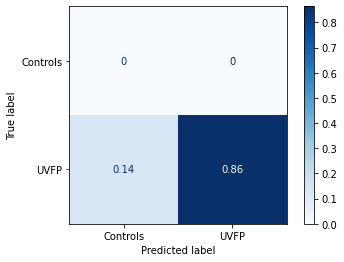




speech SGD 0.12


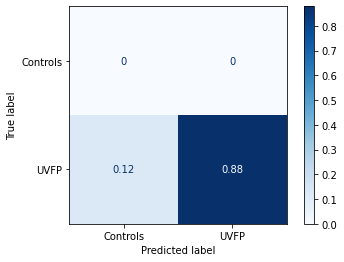




vowel
vowel LogisticRegression 0.1


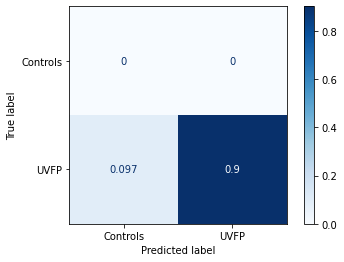




vowel MLP 0.17


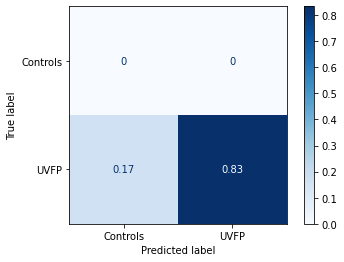




vowel RandomForest 0.31


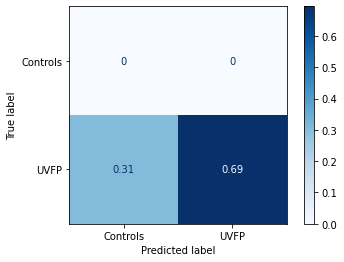




vowel SGD 0.11


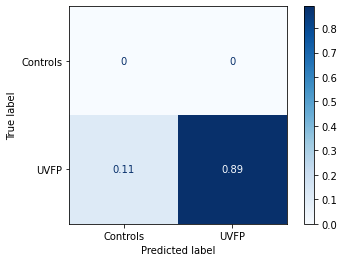




both
both LogisticRegression 0.12


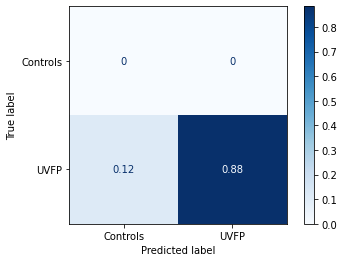




both MLP 0.2


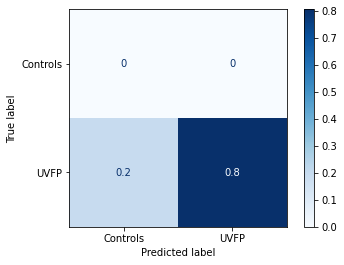




both RandomForest 0.11


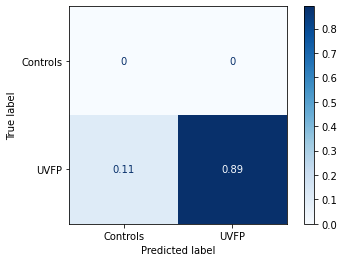




both SGD 0.23


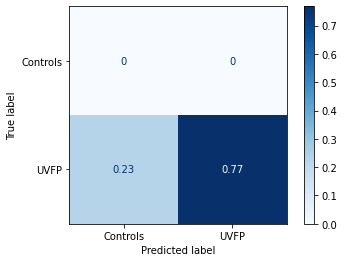

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix    

performance_all = []
y_pred_all = []

for data_type in data_types:
  print(data_type)
  url = f'https://github.com/danielmlow/vfp/raw/master/data/input/features/egemaps_vector_{data_type}.csv?raw=true' #'copied raw github button'
  df = pd.read_csv(url,  sep=',', encoding='latin1', index_col = 0) #all data
  
  # train and test sets
  df_train = df[df.sid.isin(recordingA_wo_24_patients)] #without 24 patients with different recording
  df_train = df_train[df_train.sid.isin(combined)] #now training set is unbalanced, so keep only matched controls to remaining UVFP patients.
  X_train = df_train[x_indices].values
  y_train = df_train['target'].values


  df_test = df[df.sid.isin(recordingB_24_patients)] #only 24 UVFP patients with different recording
  X_test = df_test[x_indices].values 
  y_test = df_test['target'].values
  
  # Train final model      
  performance = pd.DataFrame(np.zeros(len(classifier_names)), index = classifier_names).T

  for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('model', classifier)
    ])
    pipe.fit(X_train,y_train)
    
    # Test     
    y_pred = pipe.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    false_negitives = cm[1,0]
    positives = np.sum(y_test)
    fnr = np.round(false_negitives/positives,2) #false negative rate
    performance[name] = fnr

    print(data_type, name, fnr)
    disp = plot_confusion_matrix(pipe, X_test, y_test,
                                    display_labels=['Controls', 'UVFP'],
                                    cmap=plt.cm.Blues,
                                    normalize='true')
  
    plt.show()
    print('\n==========\n\n')




  
  performance_all.append(performance)
  y_pred_all.append(y_pred)

performance_all = pd.concat(performance_all)




In [125]:
performance_all.index = ['Reading','Vowel','Reading+Vowel']


from google.colab import files

performance_all.to_csv('fnr_wo_24_patients.csv')
files.download('fnr_wo_24_patients.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>